**# HEALTH CARE: HEART ATTACK POSSIBILITY **

This code aims to design a custom neural network model to predit the possibility of heart attack.The dataset was sourced from https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-
possibility.

# **Data Preprocessing and Exploration **

Here to deal with duplicates and missing values, the dataset is frist preprocessed.FOr understanding data basic statistics and data kinds are shown.

Required Libraries and Packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


Read Dataset

In [ ]:
data=pd.read_csv('heart.csv')

**Data preprocessing **


In [ ]:
 ## handle missing values by filling them with mean of respective column
 data.fillna(data.mean(),inplace=True)
print ("\nMissing Values: ")
print (data.isnull().sum())


Missing Values: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
##Basic statistics
print ("Data Description: ")
print (data.describe())

Data Description: 
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std     

In [ ]:
## check for duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
##display columns datatypes
print ("\Data Types: ")
print (data.dtypes)

\Data Types: 
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
##define features and target
X=data.drop('target' ,axis=1)
y=data['target']

** Extensive Feature Extraction**


Principal Component Analysis (PCA) is used in feature extraction to take out the most important characteristics from the dataset.


In [ ]:
## IT selects top 8 features
pca=PCA(n_components=8)
X_pca = pca.fit_transform(X)

**Custom feature selection**

To choose one of the best features according to their association with the target variable, a unique feature selection algorithm is created.There are no external refrences cited in implementtaion of this method.

In [ ]:
def custom_feature_selection(X,y,k=8):
 corr_matrix = X.corrwith(y)
 selected_features= corr_matrix.abs().nlargest(k).index
 return selected_features
selected_features = custom_feature_selection(X,y)
X_selected=X[selected_features]

**Feature Correlation visulaization **

Creating  a correlation matrix  to display the significance of particular elements.



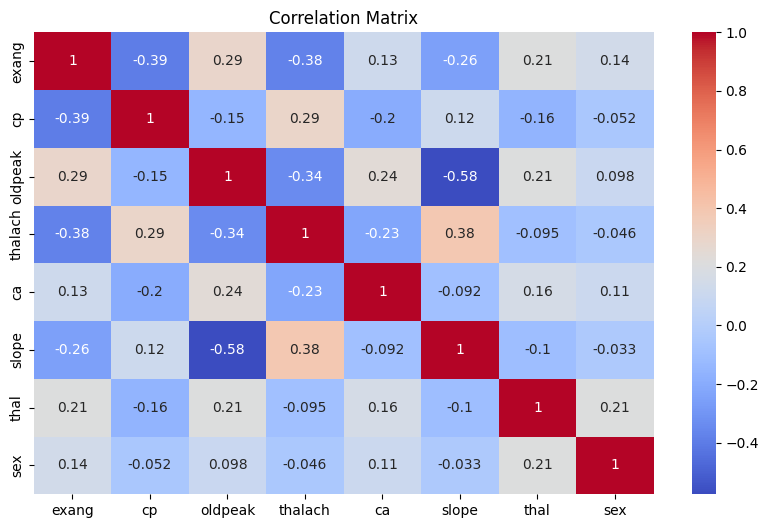

In [ ]:
def plot_feature_importance(X, y):
    plt.figure(figsize=(10, 6))
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_matrix(X_selected)

Neural Network Model

Five hidden layers and the sigmoid activation functions are used in building of a bespoke neural network model.Using the chosen features, the model is trained.

In [ ]:
 ## slpit data into train and test datasets.
X_train, X_test, y_train, y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [ ]:
  ## scale the features
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)



In [ ]:
def create_custom_model(input_dim):
 model= Sequential([
       Dense (256, input_dim=input_dim, activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0 , stddev=0.05, seed=42)),
       Dropout(0.5),
       Dense (128, activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0 , stddev=0.05, seed=42)),
       Dropout(0.5),
       Dense (64,activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0 , stddev=0.05, seed=42)),
       Dropout(0.5),
       Dense (32, activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0 , stddev=0.05, seed=42)),
       Dropout(0.5),
       Dense (16,  activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0 , stddev=0.05, seed=42)),
       Dropout(0.5),
       Dense (1, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0 , stddev=0.05, seed=42))
      ])
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 return model

**Model Training **

In [ ]:
model =create_custom_model(X_pca.shape[1])
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 42ms/step - loss: 0.6883 - accuracy: 0.5104 - val_loss: 0.6921 - val_accuracy: 0.5246
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6942 - accuracy: 0.5145 - val_loss: 0.6920 - val_accuracy: 0.5246
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6884 - accuracy: 0.5602 - val_loss: 0.6920 - val_accuracy: 0.5246
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6857 - accuracy: 0.5726 - val_loss: 0.6921 - val_accuracy: 0.5246
Epoch 5/100
8/8 [==============================] - 0s 15ms/step - loss: 0.6881 - accuracy: 0.5685 - val_loss: 0.6924 - val_accuracy: 0.5246
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6885 - accuracy: 0.5270 - val_loss: 0.6926 - val_accuracy: 0.5246
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6905 - accuracy: 0.5436 - val_loss: 0.6930 - val_accuracy: 0.5246
Epoch 8/100
8/8 [===

**Model Evaluation **

In [ ]:
accuracy=model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Accuracy: ", accuracy)

Accuracy:  0.868852436542511


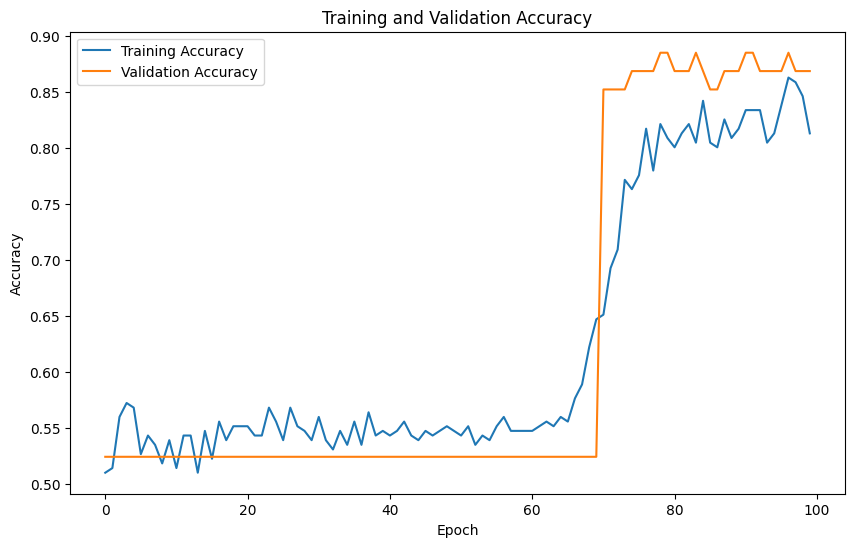

In [ ]:
## Plot training hostory
plt.figure(figsize = (10,6))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.legend()
plt.show()

